In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# EDA

Id: Unique identifier for each individual in the dataset.

Year_Birth: The birth year of the individual.

Education: The highest level of education attained by the individual.

Marital_Status: The marital status of the individual.

Income: The annual income of the individual.

Kidhome: The number of young children in the household.

Teenhome: The number of teenagers in the household.

Dt_Customer: The date when the customer was first enrolled or became a part of the company's database.

Recency: The number of days since the last purchase or interaction.

MntWines: The amount spent on wines.

MntFruits: The amount spent on fruits.

MntMeatProducts: The amount spent on meat products.

MntFishProducts: The amount spent on fish products.

MntSweetProducts: The amount spent on sweet products.

MntGoldProds: The amount spent on gold products.

NumDealsPurchases: The number of purchases made with a discount or as part of a deal.

NumWebPurchases: The number of purchases made through the company's website.

NumCatalogPurchases: The number of purchases made through catalogs.

NumStorePurchases: The number of purchases made in physical stores.

NumWebVisitsMonth: The number of visits to the company's website in a month.

AcceptedCmp3: Binary indicator (1 or 0) whether the individual accepted the third marketing campaign.

AcceptedCmp4: Binary indicator (1 or 0) whether the individual accepted the fourth marketing campaign.

AcceptedCmp5: Binary indicator (1 or 0) whether the individual accepted the fifth marketing campaign.

AcceptedCmp1: Binary indicator (1 or 0) whether the individual accepted the first marketing campaign.

AcceptedCmp2: Binary indicator (1 or 0) whether the individual accepted the second marketing campaign.

Complain: Binary indicator (1 or 0) whether the individual has made a complaint.

Z_CostContact: A constant cost associated with contacting a customer.

Z_Revenue: A constant revenue associated with a successful campaign response.

Response: Binary indicator (1 or 0) whether the individual responded to the marketing campaign.



In [ ]:
df = pd.read_csv('data')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df['Dt_Customer']

,Dt_Customer
0,04-09-2012
1,08-03-2014
2,21-08-2013
3,10-02-2014
4,19-01-2014
...,...
2235,13-06-2013
2236,10-06-2014
2237,25-01-2014
2238,24-01-2014


In [ ]:
df_copy = pd.read_csv('data', parse_dates=['Dt_Customer'])
df_copy

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df_copy['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
df_copy.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
MntFruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
MntMeatProducts,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373


In [ ]:
df_copy.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


# Preprocess

In [ ]:
df_copy = df_copy.dropna()

In [ ]:
df_copy = df_copy.sort_values(by=['Dt_Customer'], ignore_index=True)
df_copy

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,6653,1970,PhD,Married,55158.0,1,1,2012-07-30,72,293,...,7,0,0,0,0,0,0,3,11,1
1,6181,1950,2n Cycle,Together,52203.0,0,0,2012-07-31,36,488,...,6,0,0,0,0,0,0,3,11,0
2,2611,1959,Master,Together,82576.0,0,0,2012-08-01,66,1206,...,1,0,0,1,0,0,0,3,11,0
3,4692,1976,Graduation,Married,7500.0,1,0,2012-08-01,19,7,...,9,1,0,0,0,0,0,3,11,1
4,7118,1957,Graduation,Married,73803.0,0,1,2012-08-01,61,833,...,6,1,0,0,0,0,0,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,6722,1954,PhD,Married,70421.0,0,1,2014-06-28,98,479,...,6,0,0,0,0,0,0,3,11,0
2212,1371,1976,Graduation,Single,79941.0,0,0,2014-06-28,72,123,...,1,0,0,0,0,0,0,3,11,0
2213,8093,1969,Master,Married,79734.0,0,0,2014-06-28,72,572,...,1,0,0,0,1,0,0,3,11,0
2214,453,1956,PhD,Widow,35340.0,1,1,2014-06-29,1,27,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df_copy['Age'] = 2024-df_copy['Year_Birth']
df_copy

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,6653,1970,PhD,Married,55158.0,1,1,2012-07-30,72,293,...,0,0,0,0,0,0,3,11,1,54
1,6181,1950,2n Cycle,Together,52203.0,0,0,2012-07-31,36,488,...,0,0,0,0,0,0,3,11,0,74
2,2611,1959,Master,Together,82576.0,0,0,2012-08-01,66,1206,...,0,0,1,0,0,0,3,11,0,65
3,4692,1976,Graduation,Married,7500.0,1,0,2012-08-01,19,7,...,1,0,0,0,0,0,3,11,1,48
4,7118,1957,Graduation,Married,73803.0,0,1,2012-08-01,61,833,...,1,0,0,0,0,0,3,11,1,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,6722,1954,PhD,Married,70421.0,0,1,2014-06-28,98,479,...,0,0,0,0,0,0,3,11,0,70
2212,1371,1976,Graduation,Single,79941.0,0,0,2014-06-28,72,123,...,0,0,0,0,0,0,3,11,0,48
2213,8093,1969,Master,Married,79734.0,0,0,2014-06-28,72,572,...,0,0,0,1,0,0,3,11,0,55
2214,453,1956,PhD,Widow,35340.0,1,1,2014-06-29,1,27,...,0,0,0,0,0,0,3,11,0,68


In [ ]:
mnt_cols = [col for col in df_copy.columns if col.startswith('Mnt')]
mnt_cols

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

In [ ]:
df_copy['Total_Amount'] = df_copy[mnt_cols].sum(axis=1)

In [ ]:
purc_cols = [col for col in df_copy.columns if col.endswith('Purchases')]
purc_cols

['NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases']

In [ ]:
df_copy['Total_Purchase'] = df_copy[purc_cols].sum(axis=1)

In [ ]:
df_copy = df_copy.drop(['ID', 'Year_Birth'], axis=1)

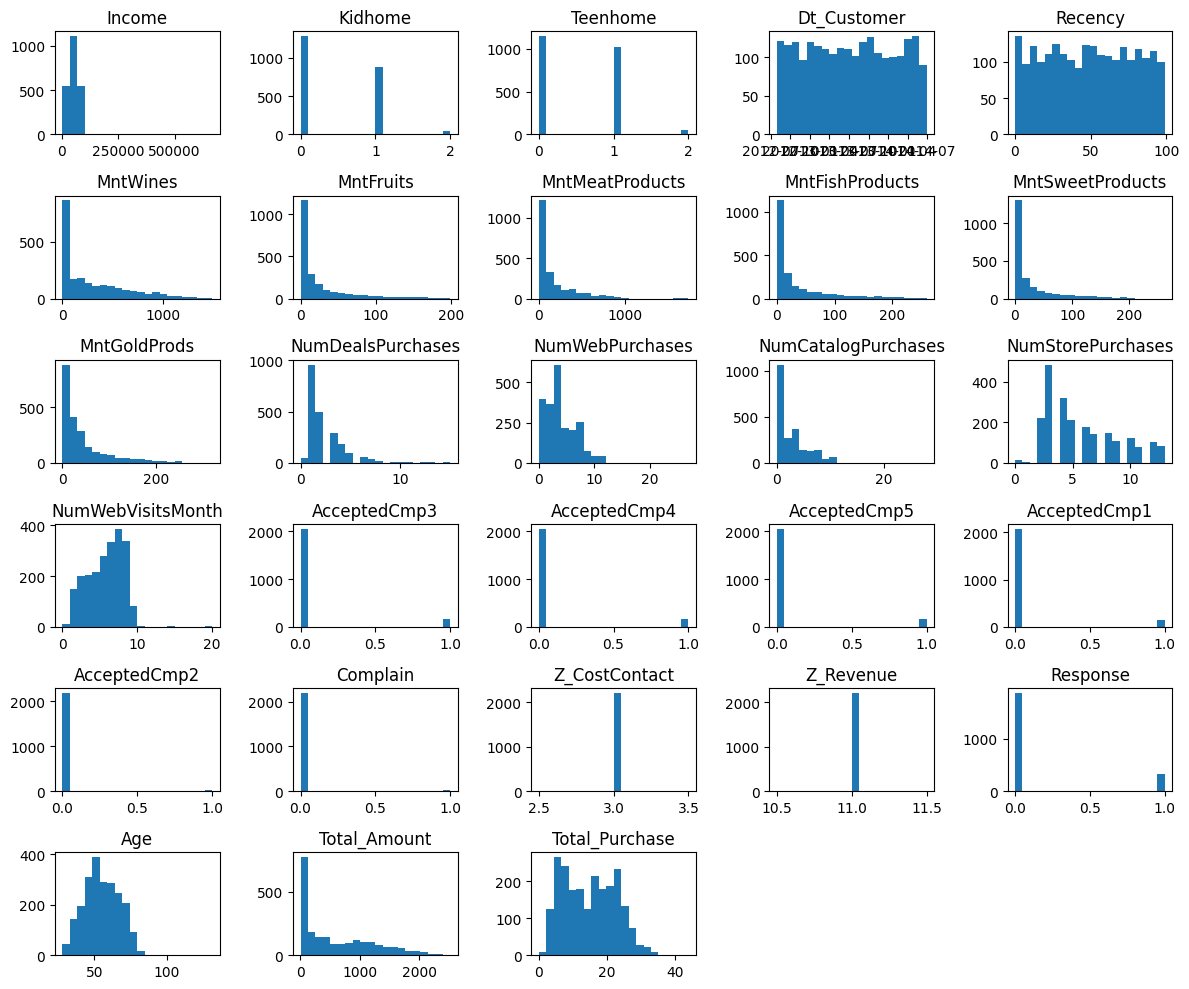

In [ ]:
df_copy.hist(grid=False, bins=20, figsize=(12, 10))
plt.tight_layout();

<Axes: xlabel='Dt_Customer'>

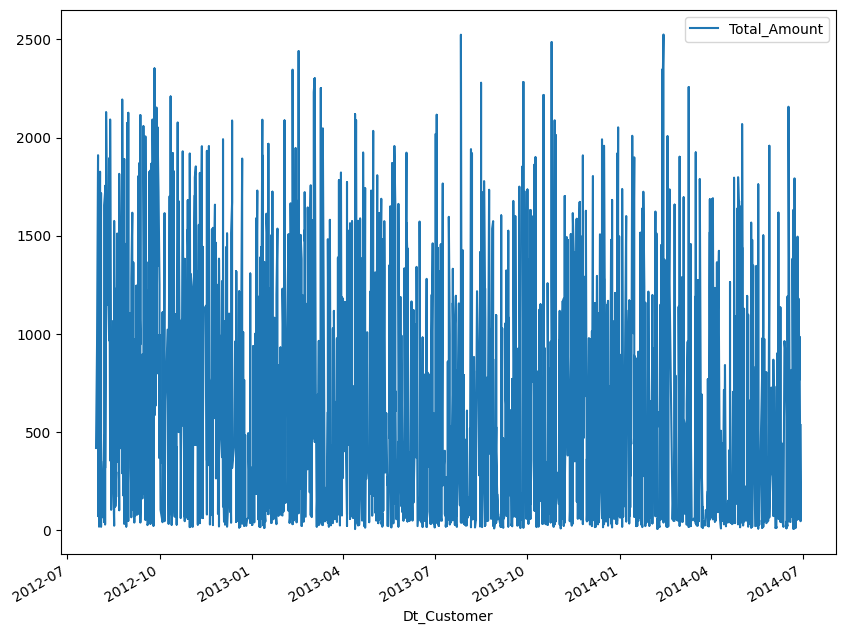

In [ ]:
df_copy[['Dt_Customer', 'Total_Amount']].set_index('Dt_Customer').plot(figsize=(10, 8))

<Axes: >

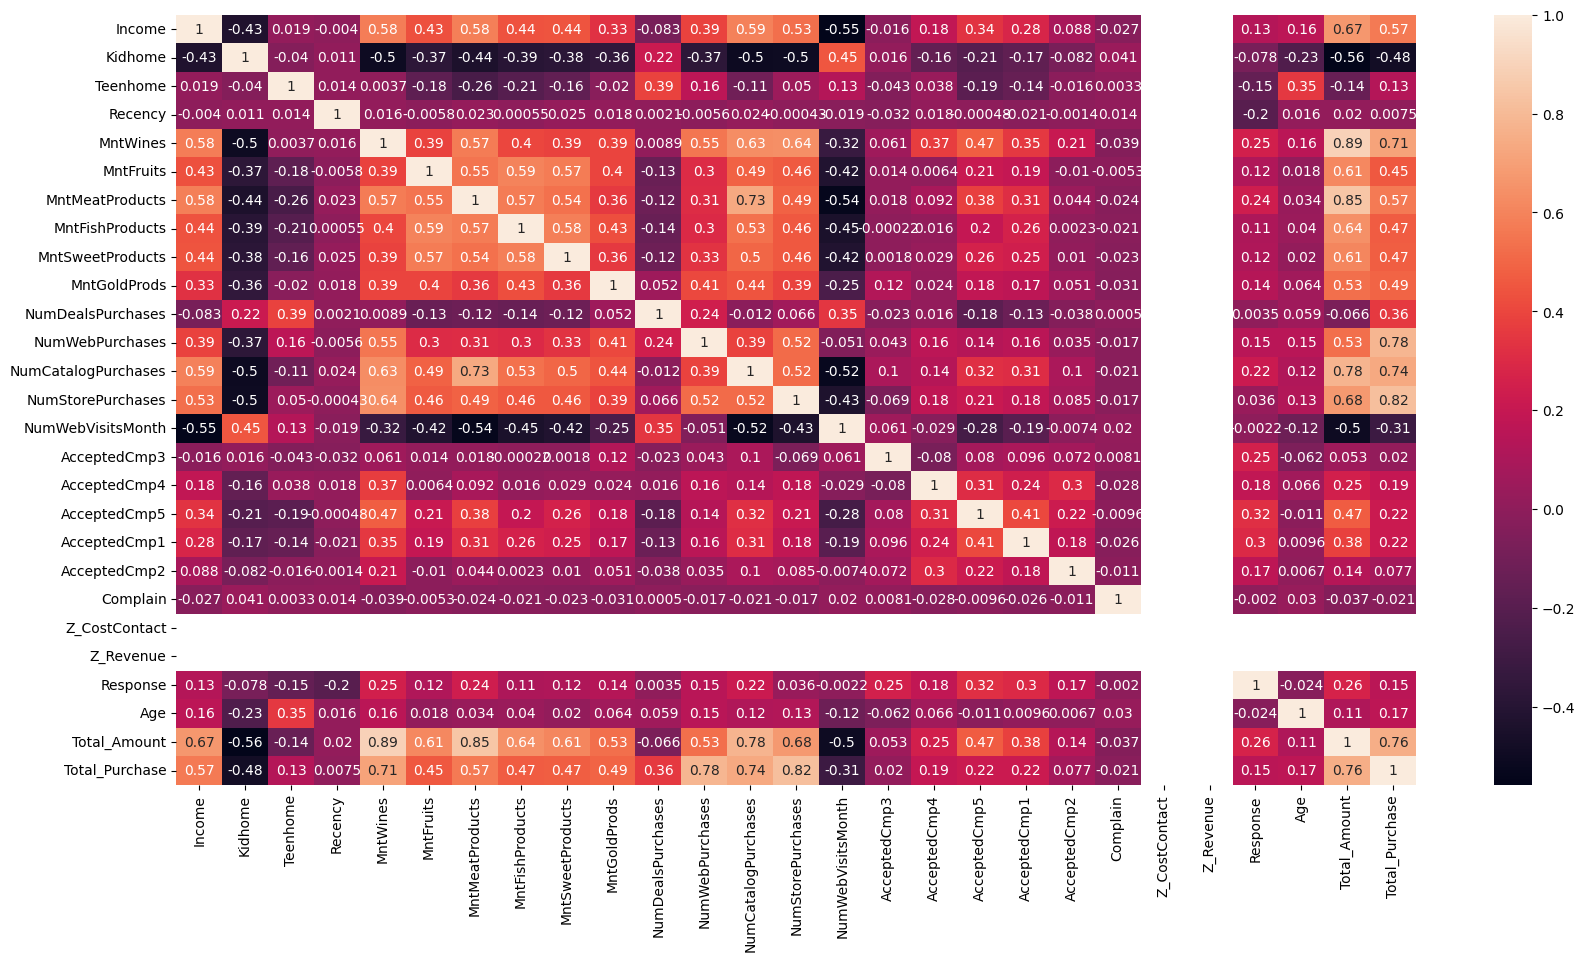

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_copy.corr(numeric_only=True), annot = True)

In [ ]:
df_copy = df_copy.drop('Dt_Customer', axis=1)

In [ ]:
num_cols = [col for col in df_copy.columns if pd.api.types.is_numeric_dtype(df_copy[col])]
cat_cols = [col for col in df_copy.columns if col not in num_cols]

In [ ]:
cat_cols

['Education', 'Marital_Status', 'Dt_Customer']

In [ ]:
df_copy['Education'].nunique()

5

In [ ]:
scaler = StandardScaler()
onehot = OneHotEncoder()

preprocessor = ColumnTransformer([('numeric', scaler, num_cols), ('categorical', onehot, cat_cols)])

df_copy_scaled = preprocessor.fit_transform(df_copy)

In [ ]:
df_copy_scaled

array([[ 0.11565553,  1.03993835,  0.90906569, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00175828, -0.82303932, -0.92897224, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.20508091, -0.82303932, -0.92897224, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.09215703, -0.82303932, -0.92897224, ...,  0.        ,
         0.        ,  0.        ],
       [-0.67179184,  1.03993835,  0.90906569, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.67129506, -0.82303932,  0.90906569, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
df_copy_scaled.shape

(2216, 40)

In [ ]:
df_copy_ = pd.DataFrame(df_copy_scaled, columns=preprocessor.get_feature_names_out())

# Model

Text(0, 0.5, 'Scores')

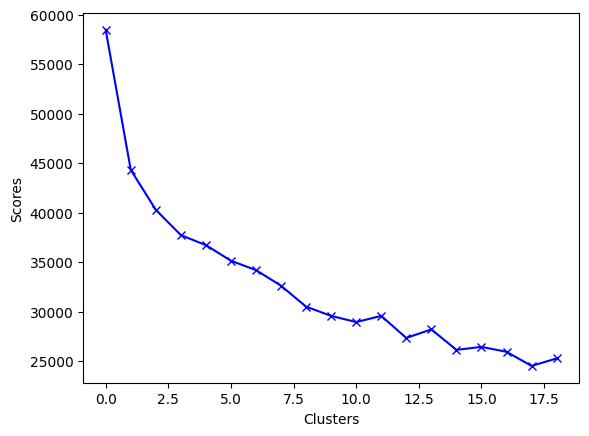

In [ ]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_copy_scaled)
  scores_1.append(kmeans.inertia_)

plt.plot(scores_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('Scores')

In [ ]:
kmeans = KMeans(10)
kmeans.fit(df_copy_scaled)
labels = kmeans.labels_

In [ ]:
kmeans.cluster_centers_.shape

(10, 40)

In [ ]:
# cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_copy_.columns])
# cluster_centers

In [ ]:
y_kmeans = kmeans.fit_predict(df_copy_scaled)
y_kmeans

array([8, 5, 2, ..., 0, 1, 5], dtype=int32)

In [ ]:
df_copy_cluster = pd.concat([df_copy_, pd.DataFrame({'cluster':labels})], axis = 1)
df_copy_cluster

,numeric__Income,numeric__Kidhome,numeric__Teenhome,numeric__Recency,numeric__MntWines,numeric__MntFruits,numeric__MntMeatProducts,numeric__MntFishProducts,numeric__MntSweetProducts,numeric__MntGoldProds,...,categorical__Education_PhD,categorical__Marital_Status_Absurd,categorical__Marital_Status_Alone,categorical__Marital_Status_Divorced,categorical__Marital_Status_Married,categorical__Marital_Status_Single,categorical__Marital_Status_Together,categorical__Marital_Status_Widow,categorical__Marital_Status_YOLO,cluster
0,0.115656,1.039938,0.909066,0.794261,-0.035853,-0.662463,-0.356754,-0.614501,-0.390351,-0.404706,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
1,-0.001758,-0.823039,-0.928972,-0.449614,0.542350,-0.134625,0.316654,0.335449,1.971886,-0.308187,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8
2,1.205081,-0.823039,-0.928972,0.586949,2.671323,0.719970,1.239802,2.381495,-0.219880,-0.501224,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
3,-1.777985,1.039938,-0.928972,-1.036999,-0.883884,-0.662463,-0.691228,-0.450087,-0.487762,-0.230973,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,0.856495,-0.823039,0.909066,0.414188,1.565324,1.348348,0.874110,0.262376,-0.025056,2.510143,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,0.722115,-0.823039,0.909066,1.692615,0.515663,0.041321,-0.138231,0.682546,-0.317292,-0.173062,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8
2212,1.100382,-0.823039,-0.928972,0.794261,-0.539928,3.459700,0.441524,3.459322,0.072356,2.510143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9
2213,1.092157,-0.823039,-0.928972,0.794261,0.791422,-0.461382,0.289896,-0.267404,0.851650,-0.520527,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
2214,-0.671792,1.039938,0.909066,-1.658936,-0.824582,-0.662463,-0.691228,-0.687574,-0.633880,-0.752171,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6


# Evaluate

In [ ]:
# Plot the histogram of various clusters
for i in df_copy_.columns:
  plt.figure(figsize = (30, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = df_copy_cluster[df_copy_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import pickle

pickle.dump(kmeans, open("data", "wb"))